<a href="https://colab.research.google.com/github/Satya-1729/Python_machine_learning/blob/main/gradient_descent_with_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      LotArea  SalePrice
0        8450     208500
1        9600     181500
2       11250     223500
3        9550     140000
4       14260     250000
...       ...        ...
1455     7917     175000
1456    13175     210000
1457     9042     266500
1458     9717     142125
1459     9937     147500

[1460 rows x 2 columns] 




[[-1.73086488]
 [-1.7284922 ]
 [-1.72611953]
 ...
 [ 1.72611953]
 [ 1.7284922 ]
 [ 1.73086488]] 





[[ 0.07337496]
 [-0.87256276]
 [ 0.07337496]
 ...
 [ 0.30985939]
 [-0.87256276]
 [-0.87256276]]
Iteration 0: Cost [0.49999999] ,dj_dw: [-0.01115648], dj_db: [1.50412407e-16] , w :[1.11564782e-06],b : [-1.50412407e-20]
Iteration 100: Cost [0.49999876] ,dj_dw: [-0.01104546], dj_db: [6.89707043e-17] , w :[0.00011212],b : [-9.50092364e-19]
Iteration 200: Cost [0.49999755] ,dj_dw: [-0.01093555], dj_db: [9.73346213e-17] , w :[0.00022202],b : [-1.8840941e-18]
Iteration 300: Cost [0.49999636] ,dj_dw: [-0.01082674], dj_db: [1.0242948e-16] , w :[0.00033082],b : [-2.798362

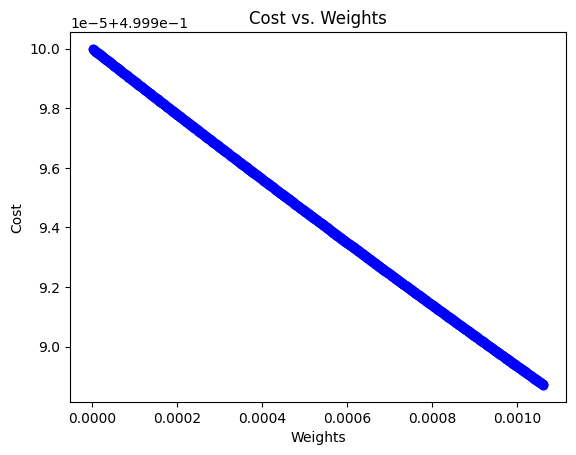

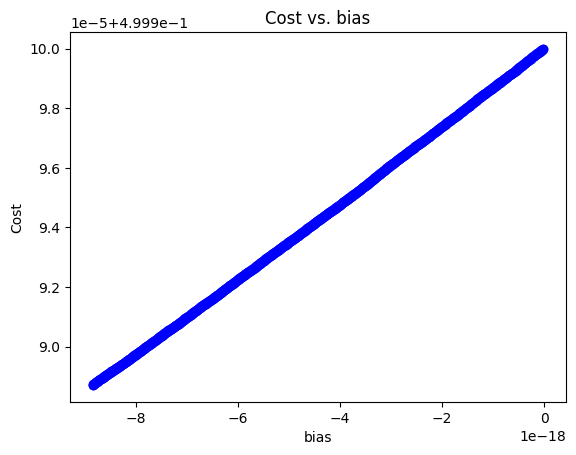

In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt


df = pd.read_csv('/content/train.csv')
df.head(5)

scaler = StandardScaler()

t = df.iloc[:,[4,-1]]
print(t,"\n\n\n\n")
x_train = scaler.fit_transform(df.iloc[:,[0]])
y_train = scaler.fit_transform(df.iloc[:,[1]])
print(x_train,"\n\n\n\n\n")
print(y_train)

#function to calculate the cost

def compute_cost(x,y,w,b):

  m = x.shape[0]
  cost = 0
  for i in range(m):
    f_wb = w*x[i] + b
    cost = cost + (f_wb - y[i])**2
  total_cost = 1/(2*m)*cost
  return total_cost


def compute_gradient(x,y,w,b):
  m = x.shape[0]

  dj_dw = 0
  dj_db = 0
  for i in range(m):
    f_wb = w*x[i] + b
    dj_dw_i = (f_wb - y[i])*x[i]
    dj_db_i = f_wb - y[i]

    dj_dw += dj_dw_i
    dj_db += dj_db_i
  dj_dw = dj_dw/m
  dj_db = dj_db/m

  return dj_dw,dj_db

def compute_gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
  w = w_in
  b = b_in
  J_hist = []
  w_hist = []
  b_hist = []

  for i in range(num_iters):
    dj_dw,dj_db = gradient_function(x,y,w,b)

    w = w - alpha*dj_dw
    b = b-  alpha*dj_db

    if i<100000:
      J_hist.append(cost_function(x,y,w,b))
      w_hist.append(w)
      b_hist.append(b)

    if i % math.ceil(num_iters/10) == 0:
      print(f"Iteration {i}: Cost {J_hist[-1]} ,dj_dw: {dj_dw}, dj_db: {dj_db} , w :{w},b : {b}")
  return w ,b,J_hist,w_hist,b_hist

intial_w = 0
intial_b = 0
iterations = 1000
alpha = 0.0001

w_final,b_final,J_hist,w_hist,b_hist = compute_gradient_descent(x_train,y_train,intial_w,intial_b,alpha,iterations,compute_cost,compute_gradient)

plt.scatter(w_hist,J_hist , color = "blue" )
plt.xlabel('Weights')
plt.ylabel('Cost')
plt.title('Cost vs. Weights')
plt.show()

plt.scatter(b_hist,J_hist , color = "blue" )
plt.xlabel('bias')
plt.ylabel('Cost')
plt.title('Cost vs. bias')
plt.show()





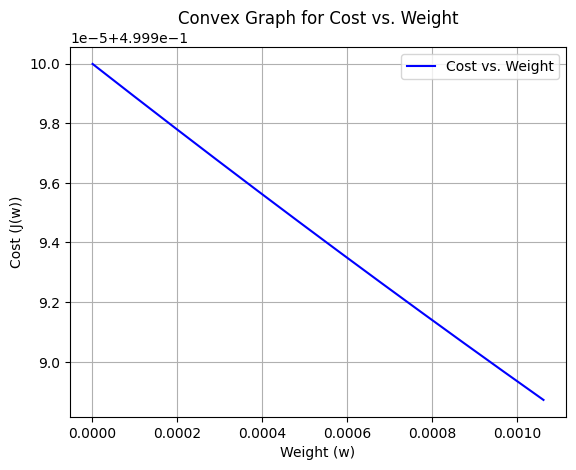

In [ ]:
# Plotting the cost function (Cost vs. Weight)
plt.plot(w_hist, J_hist, label="Cost vs. Weight", color='blue')
plt.title("Convex Graph for Cost vs. Weight")
plt.xlabel("Weight (w)")
plt.ylabel("Cost (J(w))")
plt.grid(True)
plt.legend()
plt.show()

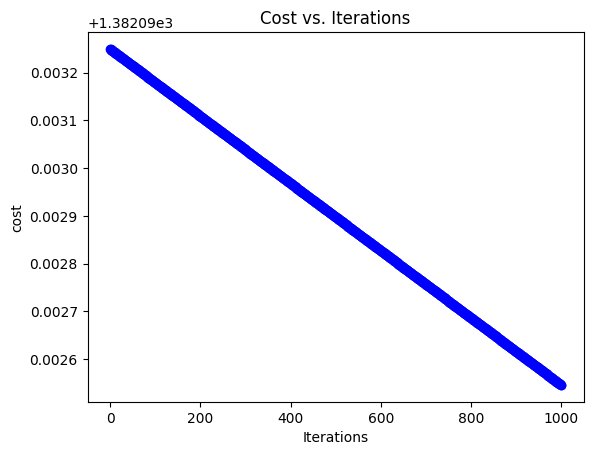

In [ ]:
iterations = np.arange(len(J_hist))

# Now plot
plt.scatter( iterations,J_hist, color="blue")
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.title('Cost vs. Iterations')
plt.show()


In [ ]:
# # let us make a linear regression model using scikit
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.linear_model import SGDRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# df = pd.read_csv('/content/train.csv')
# df.head(5)

# t = df.iloc[:,[4,-1]]
# print(t,"\n\n\n\n")

# scaler = StandardScaler()

# x_train = scaler.fit_transform(df.iloc[:,[0]])
# y_train = scaler.fit_transform(df.iloc[:,[1]])
# print(x_train,"\n\n\n\n\n")
# print(y_train,"\n\n\n\n\n")

# sgdr = SGDRegressor(max_iter = 1000)
# sgdr.fit(x_train,y_train)
# print(sgdr)

# b_norm = sgdr.intercept_
# w_norm = sgdr.coef_
# print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

# y_pred_sgdr = sgdr.predict(x_train)
# print("y_prediction",y_pred)

# y_pred = np.dot(x_train,w_norm) + b_norm
# print("y_prediction",y_pred)

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/content/train.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head(5), "\n")

# Extract specific columns for analysis (e.g., feature and target columns)
selected_columns = df.iloc[:, [4, -1]]
print("Selected columns for training:")
print(selected_columns, "\n")

# Initialize a scaler for feature normalization
scaler = StandardScaler()

# Normalize the feature (column index 0) and target (column index 1)
np.set_printoptions(precision=2)
x_train = scaler.fit_transform(df.iloc[:, [0]])
y_train = scaler.fit_transform(df.iloc[:, [1]])
print("Normalized features (x_train):")
print(x_train, "\n")
print("Normalized targets (y_train):")
print(y_train, "\n")

# Create and train a linear regression model using SGDRegressor
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_train, y_train)
print("Trained SGDRegressor model:", sgdr)

# Retrieve model parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"Model parameters:\n  Weight (w): {w_norm}\n  Bias (b): {b_norm}\n")

# Make predictions using the model
y_pred_sgdr = sgdr.predict(x_train)
print("Predictions using SGDRegressor:")
print(y_pred_sgdr, "\n")

# Compute predictions manually for verification
y_pred_manual = np.dot(x_train, w_norm.T) + b_norm
print("Manual predictions:")
print(y_pred_manual)



First 5 rows of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sale

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


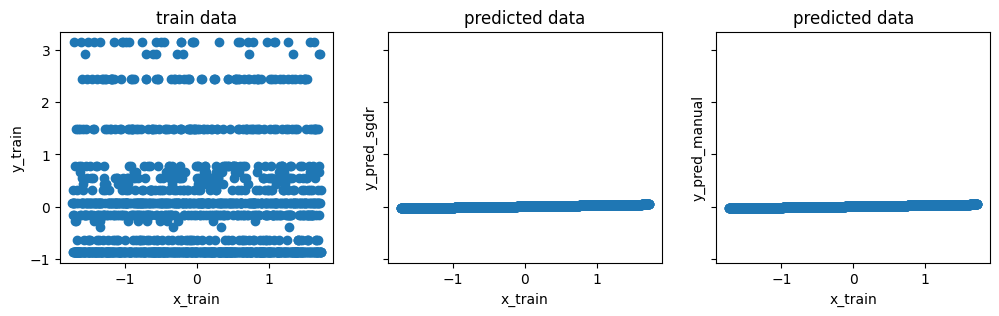

In [ ]:
fig , ax = plt.subplots(1,3,figsize=(12,3), sharey=True)
ax[0].scatter(x_train,y_train,label='train data')
ax[1].scatter(x_train,y_pred_sgdr,label='predicted data')
ax[2].scatter(x_train,y_pred_manual,label='predicted data')

ax[0].set_ylabel('y_train')
ax[0].set_xlabel('x_train')
ax[0].set_title('train data')

ax[1].set_xlabel('x_train')
ax[1].set_ylabel('y_pred_sgdr')
ax[1].set_title('predicted data')

ax[2].set_xlabel('x_train')
ax[2].set_ylabel('y_pred_manual')
ax[2].set_title('predicted data')
plt.show()